In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
import io
from google.colab import files
uploaded = files.upload()

Saving final4.csv to final4.csv


In [3]:
df = pd.read_csv('final4.csv')
df.head()

,Date,Temperature,Pressure,ExternalTemp1,Humidity
0,2022-08-20 02:03:26,17.9,1008.100,19.4,81
1,2022-08-20 02:13:26,17.9,1008.001,19.4,81
2,2022-08-20 02:23:26,17.9,1007.877,19.3,81
3,2022-08-20 02:33:26,17.8,1007.949,19.3,81
4,2022-08-20 02:53:27,18.0,1007.808,19.3,81


In [4]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

29600   2023-03-25 21:54:44
29601   2023-03-25 22:04:43
29602   2023-03-25 22:14:43
29603   2023-03-25 22:24:43
29604   2023-03-25 22:44:43
29605   2023-03-25 22:54:43
29606   2023-03-25 23:04:43
29607   2023-03-25 23:14:43
29608   2023-03-25 23:24:43
29609   2023-03-25 23:34:43
29610   2023-03-25 23:44:43
29611   2023-03-25 23:54:43
29612   2023-03-26 00:04:43
29613   2023-03-26 00:14:43
29614   2023-03-26 00:24:43
Name: Date, dtype: datetime64[ns]


In [5]:
cols = list(df)[1:5]

In [6]:
cols

['Temperature', 'Pressure', 'ExternalTemp1', 'Humidity']

In [7]:
df_for_training = df[cols].astype(float)

In [8]:
df_for_training

,Temperature,Pressure,ExternalTemp1,Humidity
0,17.9,1008.100,19.4,81.0
1,17.9,1008.001,19.4,81.0
2,17.9,1007.877,19.3,81.0
3,17.8,1007.949,19.3,81.0
4,18.0,1007.808,19.3,81.0
...,...,...,...,...
29610,-0.2,993.385,0.0,92.0
29611,-0.2,993.471,0.0,92.0
29612,-0.2,993.390,0.0,92.0
29613,-0.3,993.486,0.0,92.0


In [9]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [10]:
df_for_training_scaled

array([[ 1.95382678, -0.00368071,  2.49241903, -1.33878852],
       [ 1.95382678, -0.01129472,  2.49241903, -1.33878852],
       [ 1.95382678, -0.02083147,  2.47584473, -1.33878852],
       ...,
       [-0.78672037, -1.1350161 , -0.72299405,  0.17097682],
       [-0.80186151, -1.12763281, -0.72299405,  0.17097682],
       [-0.78672037, -1.12832499, -0.72299405,  0.17097682]])

In [11]:
df_for_training_scaled.shape

(29615, 4)

In [12]:
trainX = []
trainY = []

In [13]:
n_future = 10
n_past = 14

In [14]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [15]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [16]:
trainX

array([[[ 1.95382678, -0.00368071,  2.49241903, -1.33878852],
        [ 1.95382678, -0.01129472,  2.49241903, -1.33878852],
        [ 1.95382678, -0.02083147,  2.47584473, -1.33878852],
        ...,
        [ 1.96896792, -0.03875133,  2.45927044, -1.33878852],
        [ 1.96896792, -0.04128934,  2.45927044, -1.33878852],
        [ 1.96896792, -0.03736697,  2.45927044, -1.33878852]],

       [[ 1.95382678, -0.01129472,  2.49241903, -1.33878852],
        [ 1.95382678, -0.02083147,  2.47584473, -1.33878852],
        [ 1.93868564, -0.01529401,  2.47584473, -1.33878852],
        ...,
        [ 1.96896792, -0.04128934,  2.45927044, -1.33878852],
        [ 1.96896792, -0.03736697,  2.45927044, -1.33878852],
        [ 1.95382678, -0.03752079,  2.44269615, -1.33878852]],

       [[ 1.95382678, -0.02083147,  2.47584473, -1.33878852],
        [ 1.93868564, -0.01529401,  2.47584473, -1.33878852],
        [ 1.96896792, -0.02613821,  2.47584473, -1.33878852],
        ...,
        [ 1.96896792, -0.03

In [17]:
trainY

array([[ 1.86297991],
       [ 1.84783877],
       [ 1.83269762],
       ...,
       [-0.78672037],
       [-0.80186151],
       [-0.78672037]])

In [18]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (29592, 14, 4).
trainY shape == (29592, 1).


In [19]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [20]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
1665/1665 [==============================] - 116s 63ms/step - loss: 0.0957 - val_loss: 0.0668
Epoch 2/10
1665/1665 [==============================] - 103s 62ms/step - loss: 0.0614 - val_loss: 0.0527
Epoch 3/10
1665/1665 [==============================] - 105s 63ms/step - loss: 0.0549 - val_loss: 0.0600
Epoch 4/10
1665/1665 [==============================] - 99s 60ms/step - loss: 0.0516 - val_loss: 0.0484
Epoch 5/10
1665/1665 [==============================] - 101s 60ms/step - loss: 0.0494 - val_loss: 0.0639
Epoch 6/10
1665/1665 [==============================] - 100s 60ms/step - loss: 0.0465 - val_loss: 0.0494
Epoch 7/10
1665/1665 [==============================] - 99s 59ms/step - loss: 0.0456 - val_loss: 0.0466
Epoch 8/10
1665/1665 [==============================] - 98s 59ms/step - loss: 0.0448 - val_loss: 0.0550
Epoch 9/10
1665/1665 [==============================] - 98s 59ms/step - loss: 0.0435 - val_loss: 0.0456
Epoch 10/10
1665/1665 [==============================] - 97

In [22]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [23]:
n_past = 14
n_days_for_prediction=10

In [24]:
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)


[Timestamp('2023-03-27 22:04:43', freq='C'), Timestamp('2023-03-28 22:04:43', freq='C'), Timestamp('2023-03-29 22:04:43', freq='C'), Timestamp('2023-03-30 22:04:43', freq='C'), Timestamp('2023-03-31 22:04:43', freq='C'), Timestamp('2023-04-03 22:04:43', freq='C'), Timestamp('2023-04-04 22:04:43', freq='C'), Timestamp('2023-04-05 22:04:43', freq='C'), Timestamp('2023-04-06 22:04:43', freq='C'), Timestamp('2023-04-07 22:04:43', freq='C')]


In [25]:
prediction = model.predict(trainX[-n_days_for_prediction:])


1/1 [==============================] - 0s 266ms/step


In [26]:
prediction

array([[-0.7165829 ],
       [-0.7084051 ],
       [-0.72608614],
       [-0.7279844 ],
       [-0.7272708 ],
       [-0.7683715 ],
       [-0.75282586],
       [-0.7648286 ],
       [-0.7829421 ],
       [-0.8064517 ]], dtype=float32)

In [27]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
y_pred_future

array([0.5811584 , 0.62619567, 0.6153858 , 0.58553386, 0.5640762 ,
       0.44528744, 0.39139912, 0.35056898, 0.2825596 , 0.1766555 ],
      dtype=float32)

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
original = df[['Date', 'Temperature']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2023-01-01']

<ipython-input-52-9d488bed936a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


In [ ]:
y_pred_future

array([0.5811584 , 0.62619567, 0.6153858 , 0.58553386, 0.5640762 ,
       0.44528744, 0.39139912, 0.35056898, 0.2825596 , 0.1766555 ],
      dtype=float32)

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Forcasted':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [ ]:
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10 non-null     datetime64[ns]
 1   Forcasted  10 non-null     float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 248.0 bytes


In [ ]:
df_forecast

,Date,Forcasted
0,2023-03-24,0.581158
1,2023-03-27,0.626196
2,2023-03-28,0.615386
3,2023-03-29,0.585534
4,2023-03-30,0.564076
5,2023-03-31,0.445287
6,2023-04-03,0.391399
7,2023-04-04,0.350569
8,2023-04-05,0.282560
9,2023-04-06,0.176656


<Axes: xlabel='Date', ylabel='Temperature'>

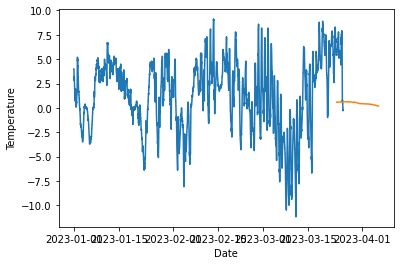

In [ ]:

sns.lineplot(x='Date', y='Temperature', data=original)
sns.lineplot(x='Date', y='Forcasted', data=df_forecast)